#  1.Import Python Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline



# setting up plot style
style.use('seaborn-poster')
style.use('fivethirtyeight')

C:\Users\91939\AppData\Local\Temp\ipykernel_8552\1087359096.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


## supress warnings

In [27]:
import warnings
warnings.filterwarnings('ignore')

## Adjust jupyter views

In [28]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr',False)

# 2. Reading & Understanding the data

### importing the input files

In [29]:
# Input ddata files are available in the read only"../input/"
# directory 
# for example,running this (by clicking roun or pressing shift+Enter) will list all the fies under the input directory

import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
        

In [30]:
applicationDF=pd.read_csv(r"C:\Users\91939\Downloads\application_data.csv")
previousDF=pd.read_csv(r"C:\Users\91939\Downloads\previous_application.csv")

In [31]:
applicationDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [32]:
previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Inspect Data Frames

In [33]:
# Database dimension

print('Database dimension-applicationDF :',applicationDF.shape)
print('Database dimension_previousDF :',previousDF.shape)


#Database size
print('Database size- applicationDF :',applicationDF.size)
print('Database size- applicationDF:',previousDF.size)

Database dimension-applicationDF : (307511, 122)
Database dimension_previousDF : (1670214, 37)
Database size- applicationDF : 37516342
Database size- applicationDF: 61797918


In [34]:
# Database column types

applicationDF.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [35]:
previousDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [36]:
applicationDF.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [37]:
previousDF.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# 4.Data cleaning & Manipulation

### 4.1 Null value calculation

<Axes: >

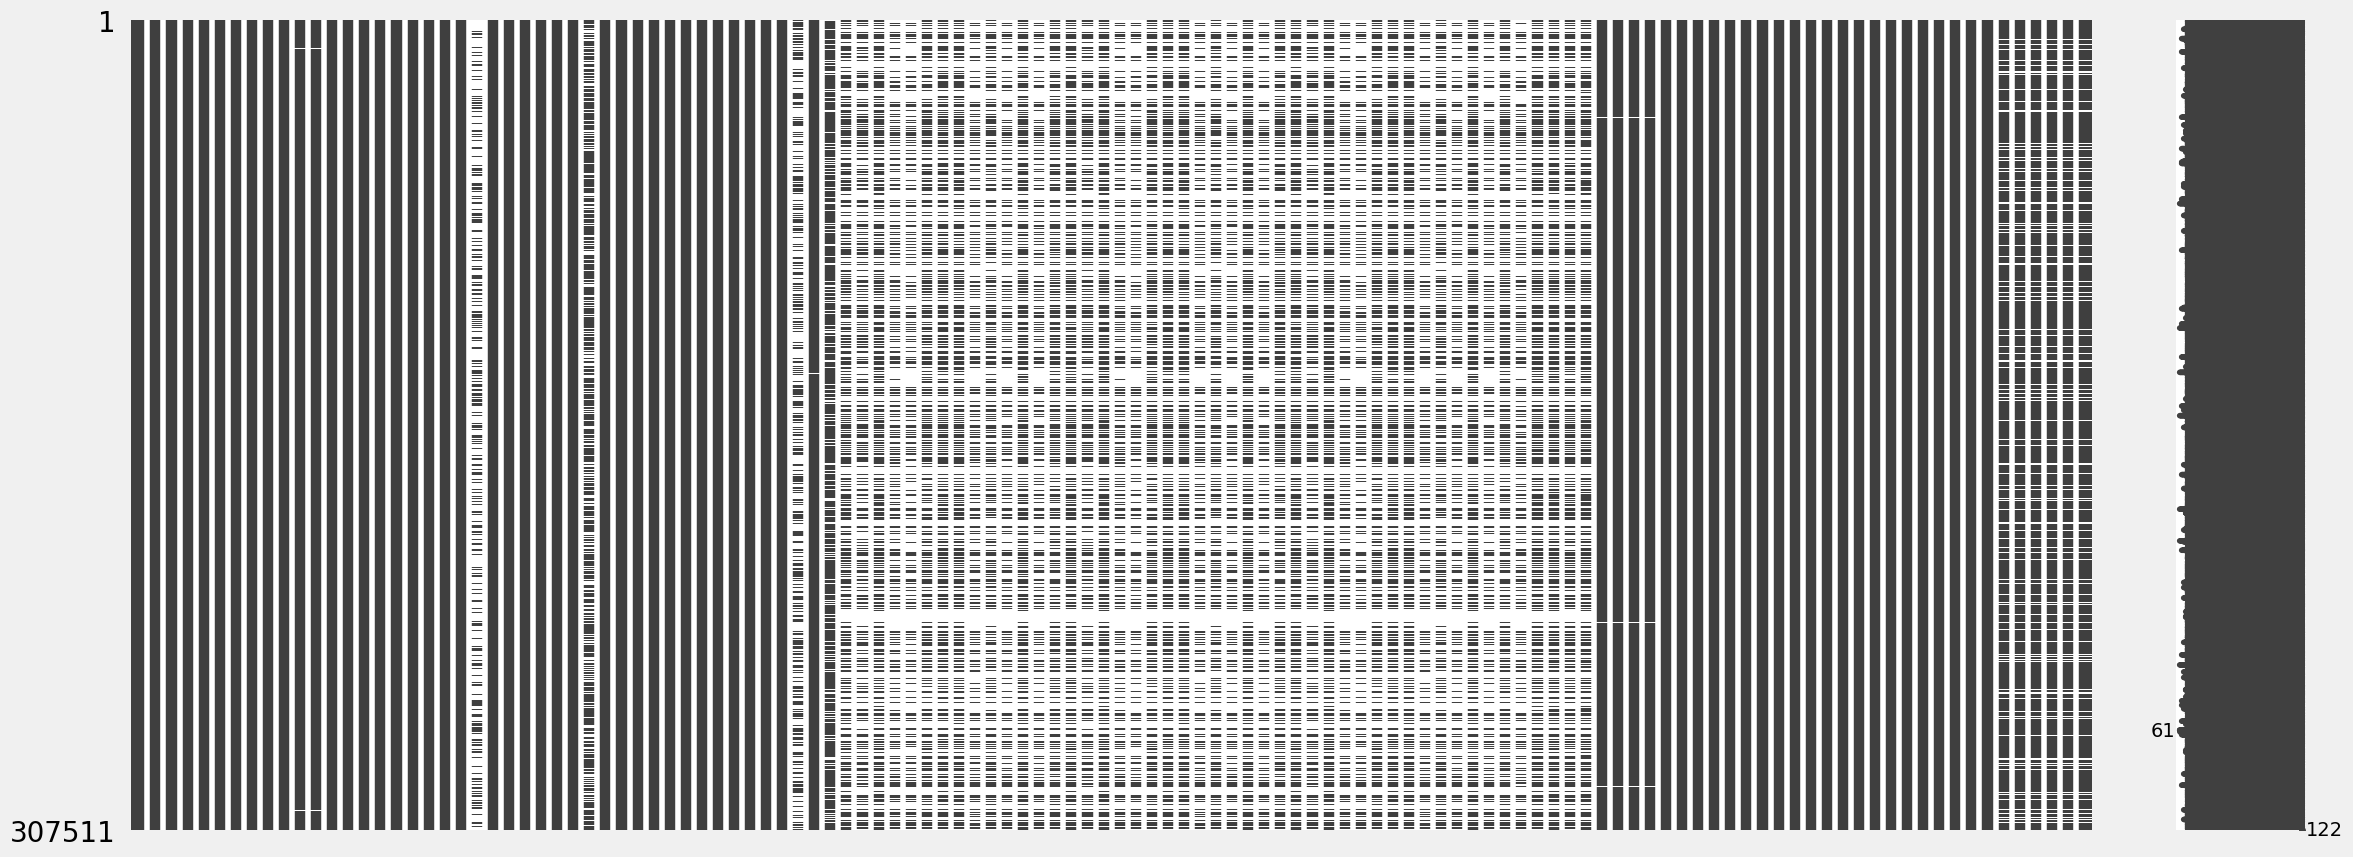

In [38]:
# applicationDF Missing values

import missingno as mn
mn.matrix(applicationDF)


#### Insight:


based on the above matrix,it is evidednt that the dataset has many missing values.
lets check for each column what is the % of missing values

In [39]:
# percentage of null value in each column
applicationDF.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [40]:
applicationDF.shape[0]

307511

In [41]:
round(applicationDF.isnull().sum()/applicationDF.shape[0]*100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### Insight:
there are many columns in applicationDF dataframe where missing value is more than 40%.lets plot the columns vs missing value % with 40% being the cutoff marks

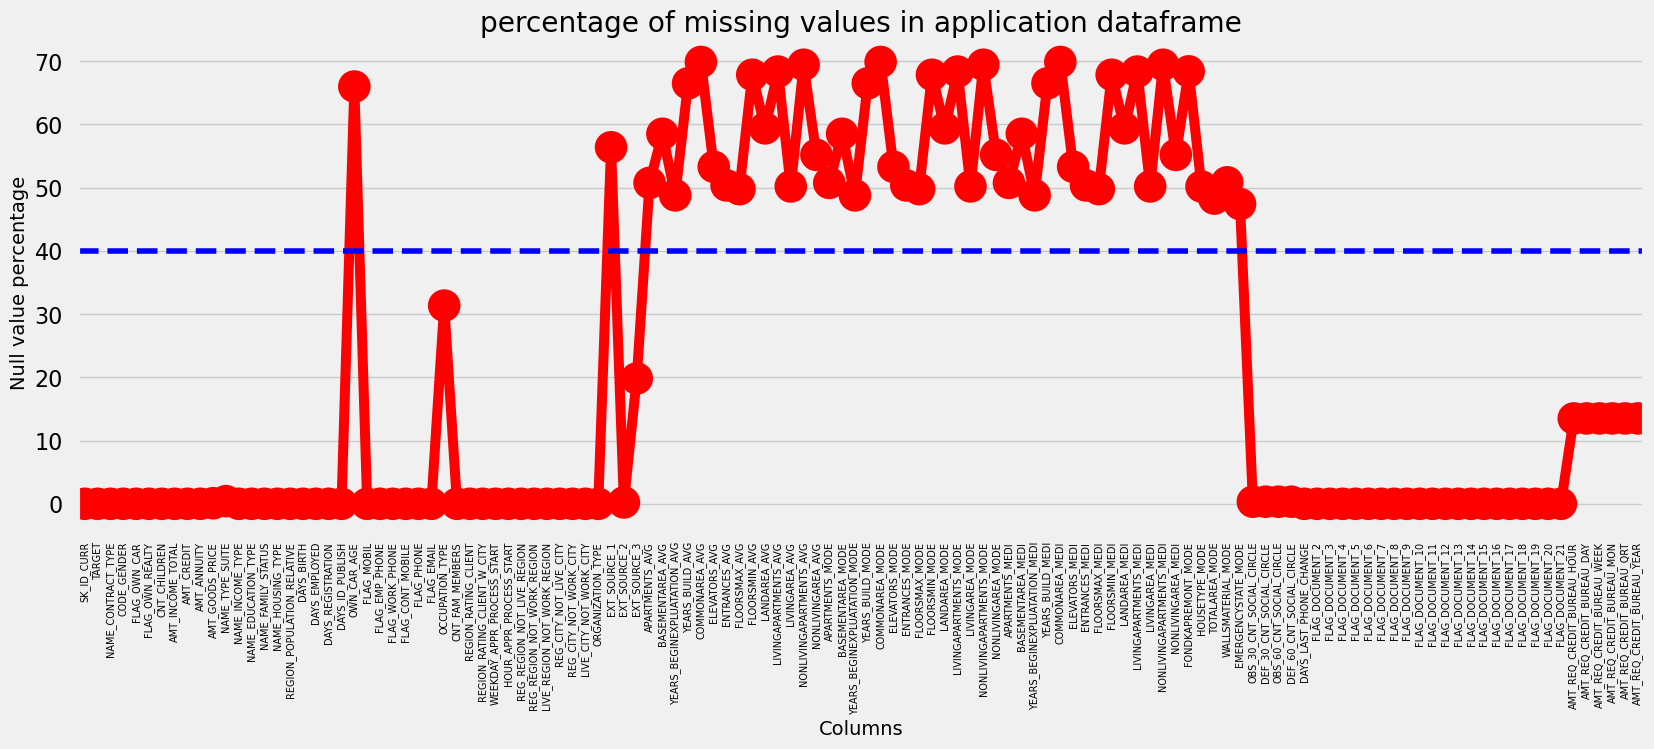

In [42]:
null_applicationDF=pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
null_applicationDF.columns=['Column Name','Null value percentage']
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x='Column Name',y='Null value percentage',data=null_applicationDF,color='red')
plt.xticks(rotation=90,fontsize=7)
ax.axhline(40,ls='--',color='blue')
plt.title('percentage of missing values in application dataframe')
plt.ylabel('Null value percentage')
plt.xlabel('Columns')
plt.show()

#### Insight:
from the above plot we can see the columns in which percentage of null values are more than 40% are marked above the blue line and the colunmns which has less than 40% null values are below blue line.lets check the columns which has more than 40% missing values

In [43]:
#more than or equal to 40% empty rows columns

nullcol_40_application=null_applicationDF[null_applicationDF['Null value percentage']>=40]
nullcol_40_application

,Column Name,Null value percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [44]:
#how many columns have more than or equal to 40% null values
len(nullcol_40_application)

49

#### Insight:
Total 49 columns are there which have more than or equal tp 40% null values.seems like most of the columns with high missing values are related to different areas  sizes on apartment owned/Rented by the loan applicant

## 4.2 PreviousDF missing values

<Axes: >

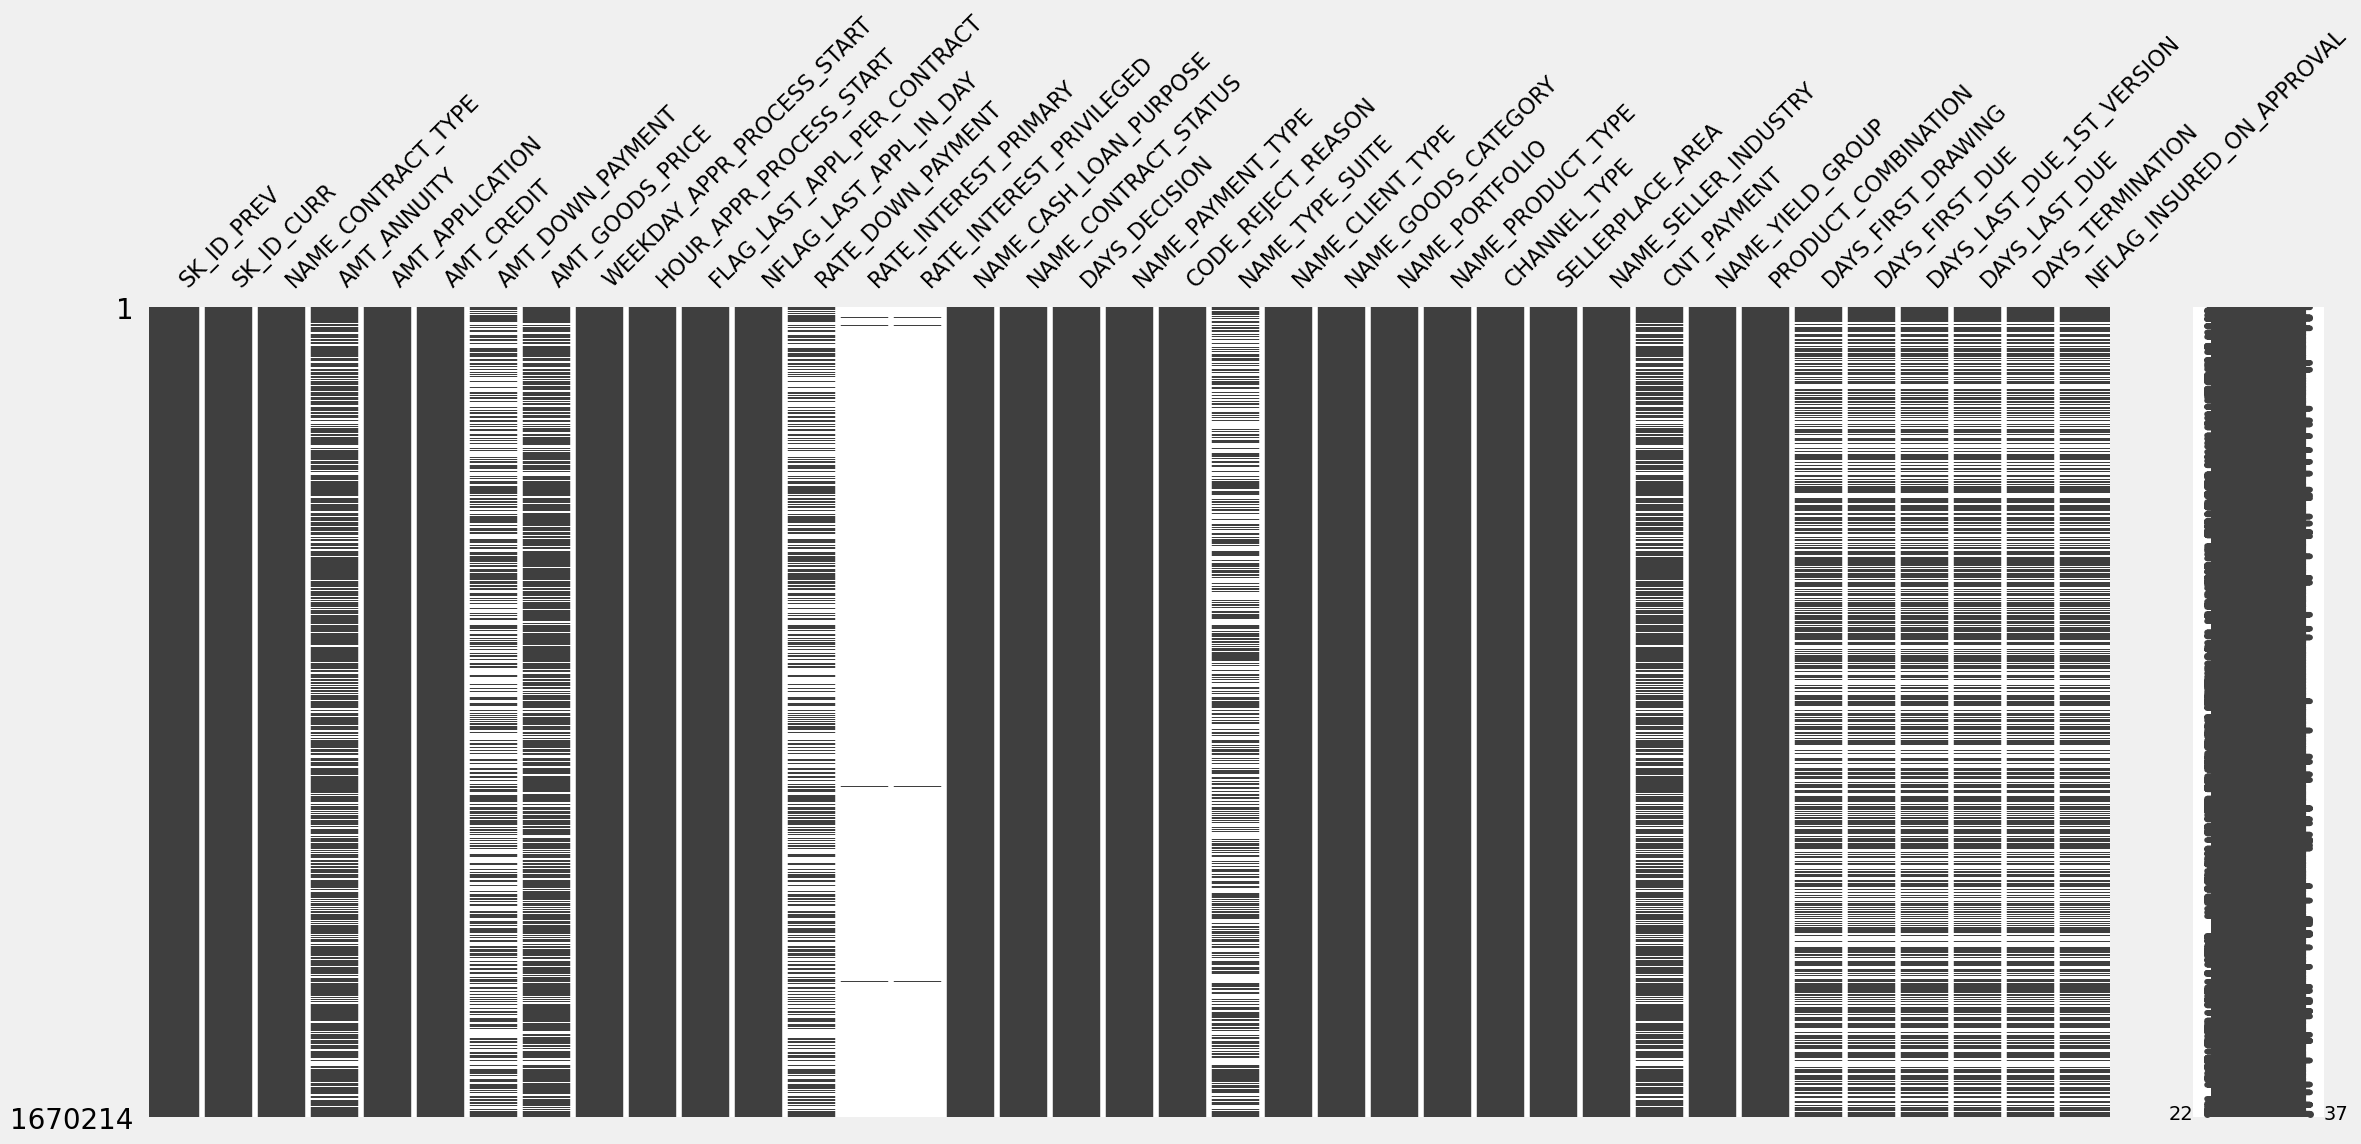

In [45]:
mn.matrix(previousDF)

In [46]:
round(previousDF.isnull().sum()/previousDF.shape[0]*100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

### Insight:
there are manycolumns in previousDF dataframe where missing values are more than 40% lets plot the column vs missing value %  with 40% being the cutoff

In [47]:
null_previousDF=pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
null_previousDF.columns=['Column Name','Null Values Percentage']
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x='Column Name',y='Null Values Percentage',data=previousDF,color='blue')
plt.xticks(rotation=90,fontsize=7)
ax.axhline(40,ls='--',color='red')
plt.title('Percentage of Missing values in previousDF data')
plt.ylabel('Null Values Percentage')
plt.xlabel('Columns')
plt.show()

ValueError: Could not interpret input 'Column Name'

<Figure size 1800x600 with 0 Axes>

### Insight:
from the plot we can see the columns in which percentage of null values more than 40% are marked above blue line and the columns which have less than 40% null values below the red line.Lets check the columns which have more than 40% missing valuesa


In [ ]:
# more than or equal to 40% empty rows columns
nullcol_40_previous=null_previousDF[null_previousDF['Null Values Percentage']>=40]
nullcol_40_previous

In [ ]:
#how many columns have more than or equal to 40% null values
len(nullcol_40_previous
   )

## insight:
total of 11 columns are there which have mote than 40% null values.these colun=mns can be deleted.before deleting these columns lets review if there are more columns which can be dropped or not

# 4.3 Analyze and delete unnecessary columns in applicationDF

In [ ]:
#checking correlation of EXT_SOURCE_X columns vs TARGET column
Source=applicationDF[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
source_corr=Source.corr()
ax=sns.heatmap(source_corr,
              xticklabels=source_corr.columns,
              yticklabels=source_corr.columns,
              annot=True,
              cmap='jet')

## Insight:
based on the heatmap,we can see there is almost no correlation between EXT-SOURCE_X columns and target column,thus we can drop these columns.EXT_SOURCE_1 Hhas 56% null values,where as EXT_SOURCE_3 has close to 20% null values

In [ ]:
#create a list of columns that neeeds to be dropped including the columns with with >40% null values

Unwanted_application=nullcol_40_application['Column Name'].tolist()+['EXT_SOURCE_2','EXT_SOURCE_3']
# AS EXT_SOURCE_1 column is already included in nullcol_40_application
len(Unwanted_application)

# 4.4 Flag Document

In [ ]:
# checking the relevance of Flag_Document and whether it has any relation with loan repayment status
    col_Doc=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
    
    df_flag=applicationDF[col_Doc+['TARGET']]
    
    length=len(col_Doc)
    
    df_flag['TARGET']=df_flag['TARGET'].replace({1:'Defaulter',0:'Repayer'})
    
    fig=plt.figure(figsize=(21,24))
    
    for i,j in itertools.zip_longest(col_Doc,range(length)):
        plt.subplot(5,4,j+1)
        ax=sns.countplot(df_flag[i],hue=df_flag['TARGET'],palette=['r','g'])
        
        plt.yticks(fontsize=8)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(i)

#  # Insight:
the above graph shows that in most of the loan applicant cases,
clients who applied for loans has not submitted FLAG_DOCUMENT_X
except FLAG_DOCUMENT_3 thus except for FLAG_DOCUMENT_3,we can delete rest of the columns,Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan

In [ ]:
# including the flag dicuments for fropping the Document collumns

col_Doc.remove('FLAG_DOCUMENT_3')
Unwanted_applicatin=Unwanted_application+col_Doc
len(Unwanted_application)

# 4.5 contact parameters

In [ ]:
# checking is there is any correlation between mobile phone,work phone etc, email,Family members and Region rating

contact_col=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
Contact_corr=applicationDF[contact_col].corr()
fig=plt.figure(figsize=(8,8))

ax=sns.heatmap(Contact_corr,xticklabels=Contact_corr.columns,yticklabels=Contact_corr.columns,annot=True,cmap='jet',linewidth=1)

## insight:
there is no correlation between flags of mobile phone,email etc with loan repayment;thus these columns can be deleted

In [ ]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET')
Unwanted_application=Unwanted_application + contact_col
len(Unwanted_application)

## insight:
total 76 columns can be deleted from applicationDF

In [ ]:
# Dropping the unnecessary columns from applicationDF

applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)

In [ ]:
# insepecting the dataframe after removal of unnecessary columns

applicationDF.shape

In [ ]:
# inspecting the column types after removal of unnecessary columns

applicationDF.info()

## insight:
after deleting unnecessary columns,there are 46 columns remaining in applicationDF

# 4.6 Analyze and delete unnecessary columns in previousDF

In [ ]:
# getting the 11 columns which has more than 40% unknown
Unwanted_previous=nullcol_40_previous['Column Name'].tolist()
Unwanted_previous

In [ ]:
# Listing down columns which are not needed
Unnecessary_previous=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [ ]:
Unwanted_previous=Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

## insight:
total 15 columns can be deleted from previousDF

In [ ]:
# Dropping the unnecessay columns from previous
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)
#Inspecting the dataframe after removal of unnecessary columns
previousDF.shape

In [ ]:
# inspecting the column types after removal of unnecessary columns
previousDF.info()

## insight:
after deleting unnecessary columns,there are 22 columns remaining in applicationDF

# 4.7 standardize values

In [ ]:
# converting negative days to positive days

date_col=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    applicationDF[col]=abs(applicationDF[col])

In [ ]:
# binning numerical columns to create a categorical column

#creating bins for income amount

applicationDF['AMT_INCOME_TOTAL']=applicationDF['AMT_INCOME_TOTAL']/100000


bins=[0,1,2,3,4,5,6,7,8,9,10,11]
slot=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M','1M Above']

applicationDF['AMT_INCOME_RANGE']=pd.cut(applicationDF['AMT_INCOME_TOTAL'],bins,labels=slot)

In [ ]:
applicationDF['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

# insight:
more than 50% loan applicants have income amount in the range of 100-200k.Almost 92% loan applicants have income less than 300k

In [ ]:


#creating bins for credit amount

applicationDF['AMT_CREDIT']=applicationDF['AMT_CREDIT']/100000


bins=[0,1,2,3,4,5,6,7,8,9,10,100]
slot=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M','1M Above']

applicationDF['AMT_CREDIT_RANGE']=pd.cut(applicationDF['AMT_CREDIT'],bins=bins,labels=slot
                                        )

In [ ]:
# checking the binning of data and % of data in each category

applicationDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

# # insight:
more than 16% loan applicants have taken loan which amounts to mote than 1M

In [ ]:
# Creating bins for age
applicationDF['AGE']=applicationDF['DAYS_BIRTH']//365
bins=[0,20,30,40,50,100]
slots=['0-20','20-30','30-40','40-50','50 above']

applicationDF['AGE_GROUP']=pd.cut(applicationDF['AGE'],bins=bins,labels=slots)


In [ ]:
# checking the binning of data and % of data in each category
applicationDF['AGE_GROUP'].value_counts(normalize=True)*100

# # insight:
31% loan applicants have age above 50 years.more than 55% of loan applicants have age over 40 years

In [ ]:
# creating bins for employment time

applicationDF['YEARS_EMPLOYED']=applicationDF['DAYS_EMPLOYED']//365
bins=[0,5,10,20,30,40,50,60,150]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']


applicationDF['EMPLOYMENT_YEAR']=pd.cut(applicationDF['YEARS_EMPLOYED'],bins=bins,labels=slots)




In [ ]:
# checking the binning of data and % of data in each category
applicationDF['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

## insight:
more than 50% of the loan have work experience 0-5 years and almost80% of them have less than 10years of work experience

In [ ]:
#checking the number of uniquevalues each column posses to identify categorical columns
applicationDF.nunique().sort_values()

# 4.8 Data Type conversion

In [ ]:
# inspecting the column types if they are incorrect data type using the above result
applicationDF.info()

## insight
numberic columns are already int64 and float64 format.hence proceeding with other columns

In [ ]:
# conversion of object and Numerical columns to categorical columns
categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY']


for col in categorical_columns:
    applicationDF[col]=pd.Categorical(applicationDF[col])

In [ ]:
# inspecting thc column types if the above conversion is reflected
applicationDF.info()

# 4.9 standardize values for previousDF

In [ ]:
# checking the number of unique values each column posses to identify categorical columns

previousDF.nunique().sort_values()

In [ ]:
#inspecting the column types if the above conversion is reflected
previousDF.info()

In [ ]:
# converting negative days to positive days
previousDF['DAYS_DECISION']=abs(previousDF['DAYS_DECISION'])

In [ ]:
#AGE Group calculation eg 388 will begrouped as 300-400

previousDF['DAYS_DECISION_GROUP']=(previousDF['DAYS_DECISION']-(previousDF['DAYS_DECISION']%400)).astype(str)+'-'+((previousDF['DAYS_DECISION']-(previousDF['DAYS_DECISION']%400)) +(previousDF['DAYS_DECISION']%400)+(400-(previousDF['DAYS_DECISION']%400))).astype(str)


In [ ]:
previousDF['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

## insight

almost 37% loan applicants have applied for a new loan within 0-400 days of previous loan decision

In [ ]:
#converting categorical columns from object to categorical
Categorical_col_p=['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Categorical_col_p:
    previousDF[col]=pd.Categorical(previousDF[col])

In [ ]:
#inspecting the column types after conversion
previousDF.info()

## 4.10 Imputing null values in applicationDF

In [ ]:
# checking the null value % of each column in applicationDF dataframe

round(applicationDF.isnull().sum()/applicationDF.shape[0]*100.00,2)

In [ ]:
applicationDF['NAME_TYPE_SUITE'].describe()

In [ ]:
applicationDF['NAME_TYPE_SUITE'].fillna((pplicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace=True)

In [ ]:
applicationDF['OCCUPATION_TYPE']=applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

In [ ]:
applicationDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MONTH','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

In [ ]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']


for col in amount:
    applicationDF[col].fillna(applicationDF[col].median(),inplace=True)



In [ ]:
# checking the null value % of each column in previousDF dataframe

round(applicationDF.isnull().sum()/previousDF.shape[0]*100.00,2)

# 4.11 imputing null values in previousDF

In [ ]:
#checking the null value % of each column in previousDF dataframe

round(previousDF.isnull().sum()/previousDF.shape[0]*100.00,2)

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_ANNUITY'])
plt.show()

## insight:
there is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean wouldj not be the right approach and hence imputing with median

In [ ]:
previousDF['AMT_ANNUITY'].fillna(previousDF['AMT_ANNUITY'].median(),inplace=True)

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])])

##  insight:
there are several peaks along the distribution.lets impute using the mode,mean and median and see if the distribution is still about the same


In [ ]:
statsDF=pd.DataFrame()#new dataframe with columns imputed with mode,median and mean

statsDF['AMT_GOODS_PRICE_mode']=previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())

statsDF['AMT_GOODS_PRICE_median']=previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())

statsDF['AMT_GOODS_PRICE_mean']=previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mean())

cols=['AMT_GOODS_PRICE_mode','AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.subtitle('Distribution of original data vs imputed data')

plt.subplot(221)
sns.distplot(previousDF['AMT_GOODS_PRICE'][pd.null(previousDF['AMT_GOODS_PRICE'])]);

for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

## insight:
the original distribution is closer with the distribution of data imputed with mode in this case

In [ ]:
previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0],inplace=True)

## insight:
impute CNT_PAYMENT  with o as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [ ]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

In [ ]:
previousDF['CNT_PAYMENT'].fillna(0,inplace=True)

In [ ]:
#checking the null value % of each column in previousDF dataframe

round(previousDF.isnull().sum()/previousDF.shape[0]*100.00,2)

## insight:
we still have few null values in the PRODUCT_COMBINATION column.we can ignore this percentage is very less

## 4.12 Identifying the outliers

In [ ]:
#finding outlier information in applicationDF

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")
    
    
    
for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

## insight:

it can be seen that in curent application data

1.AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

2.AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.


3.DAYS_BIRTH has no outliers which means the data available is reliable.

4.DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.


In [ ]:
applicationDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()


In [ ]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']



for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")
    
    
for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

## insight:

1.AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.


2.CNT_PAYMENT has few outlier values.

3.SK_ID_CURR is an ID column and hence no outliers.

4.DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.



In [ ]:
previousDF[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()


# 5 DATA ANALYSIS

## strategy

The data analysis flow has been planned in following way :

imbalance in Data
Categorical Data Analysis
Categorical segmented Univariate Analysis
Categorical Bi/Multivariate analysis
Numeric Data Analysis
Bi-furcation of databased based on TARGET data
Correlation Matrix
Numerical segmented Univariate Analysis
Numerical Bi/Multivariate analysis


## 5.1 imbalance analysis

In [48]:
Imbalance=applicationDF['TARGET'].value_counts().reset_index()
plt.figure(figsize=(10,4))
x=['Repayer','Defaulter']
sns.barplot(x,'TARGET',data=Imbalance,palette=['g','r'])

plt.xlabel('Loan Repayment Status')
plt.ylabel('Count of Repayers & Defaulters')
plt.title('Imbalance Plotting')

plt.show()

TypeError: barplot() got multiple values for argument 'data'

<Figure size 1000x400 with 0 Axes>